In [31]:
# IMPORTING NEEDED PYTHON PACKAGES
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import csv
import time

In [83]:
images = ["southcamp.jpg","northcamp.jpg"]#,"ridge.jpg","lifecenter.jpg","bbhville.jpg","therest.jpg"]

AxesImage(144,144;892.8x869.76)


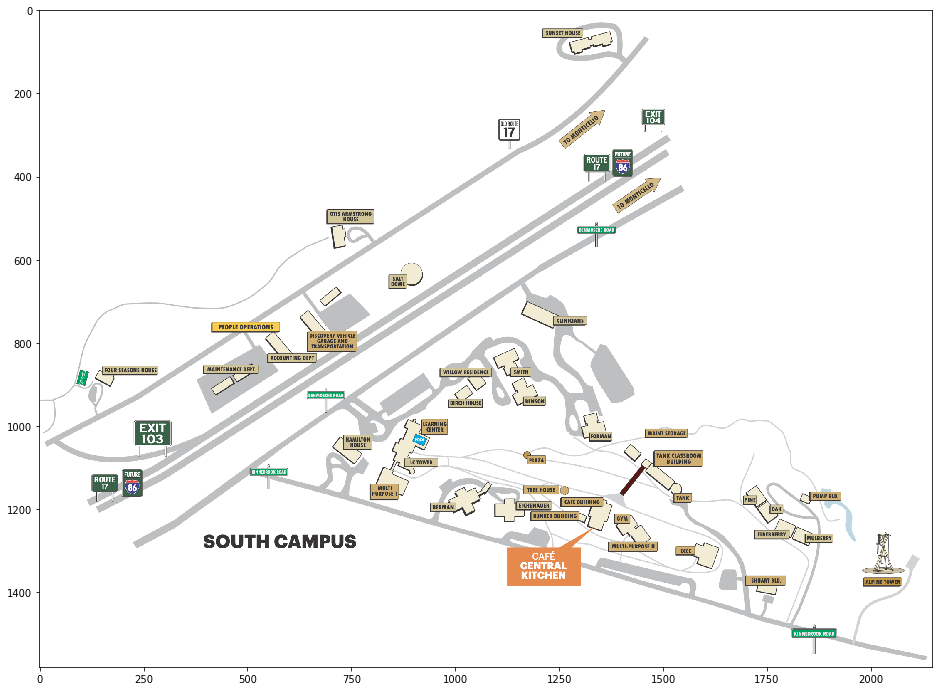

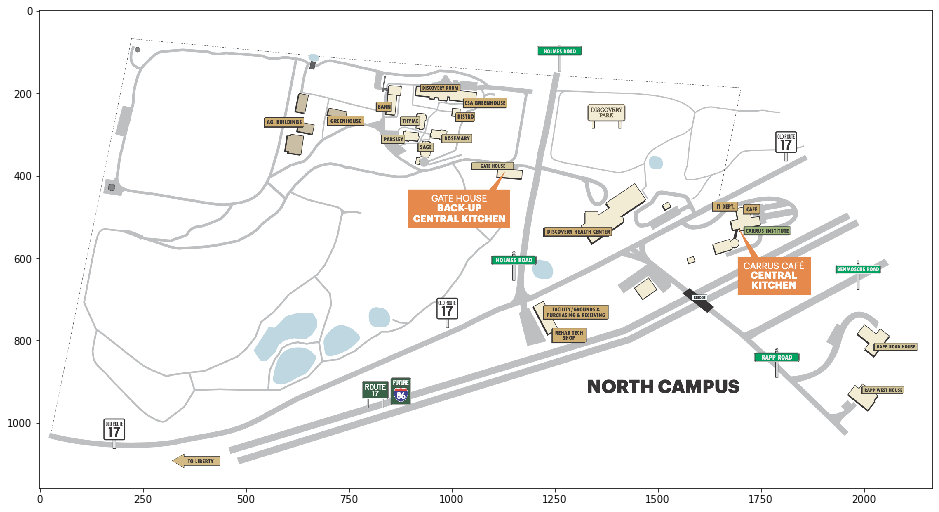

In [84]:
#*********************************PREVIEW
for i in images:
    plt.figure(figsize=(16, 16))
    #select_location = input("Please enter site: ") #include .jpg
    #print (i)
    if i in images:
        index = images.index(i)
    location = mpimg.imread(images[index])
    imgplot = plt.imshow(location)
print(imgplot)
#***************************************

In [91]:
#****************************************VARIABLES*******************************************

overlay_drawing = []
loc_image = []
risk_data = 'Heat Map Sites.csv'
line_num = 0
risk_high = []
risk_med = []
risk_low = []
loc_risk =[]
out = []

# SETTING COLOR AND TRANSPARENCY
colorGrn = (0, 255, 0) # SETS THE INITIAL COLOR OF MAP
colorYel = (255, 255, 0) # SETS THE INITIAL COLOR OF AN ELLIPSE
colorRed = (255, 0, 0)
colorBlank = (0,0,0)

degree_transparency_grn = .3
degree_transparency_yel = .5 # HOW TRANSPARENT; 1 MEANING FULLY, 0 MEANING NO TRANSPARENCY
degree_transparency_red = .5
degree_transparency_blank = .0

opacity_grn = int(255 * degree_transparency_grn) # DETERMINING DEGREE OF TRANSPARENCY MASK
colorGrn = colorGrn + (opacity_grn,)
opacity_yel = int(255 * degree_transparency_yel) # DETERMINING DEGREE OF TRANSPARENCY MASK
colorYel = colorYel + (opacity_yel,) # ADDING ALPHA CHANNEL TO SELECTED COLOR
opacity_red = int(255 * degree_transparency_red) # DETERMINING DEGREE OF TRANSPARENCY MASK
colorRed = colorRed + (opacity_red,)
opacity_blank = int(255 * degree_transparency_blank) # DETERMINING DEGREE OF TRANSPARENCY MASK
colorBlank = colorBlank + (opacity_blank,)

# LABELING COORDINATES OF WHERE BUILDINGS ARE LOCATED
sc_coords = {"Hamilton":(700,1000, 800,1100),"Berman":(980,1130,1080,1230),
               "Eichenauer":(1080, 1150, 1180, 1250), "Birch":(980,870,1080,970),
               "Willow":(980,850,1080,950),"Smith":(1070,800,1170,900),
               "Benson":(1120,870,1220,970),"Forman":(1280, 950, 1380, 1050),
               "Oak":(1700,1150,1800,1250),"Mulberry":(1790,1220,1890,1320),
            "Sunset North":(1250,0,1400,150),"Sunset South":(1250,0,1400,150),
            "Otis Armstrong":(670,500,770,600),"Four Seasons":(120,830,220,930), 
             "Pine":(1680,1130,1780,1230)}

nc_coords = {"Thyme":(870,220,970,320),"Parsley":(860,270,960,370),
             "Rosemary ":(920,250,1020,350), "Sage":(900,300,1000,400),
            "Rapp R":(1980,750,2080,850), "Rapp West":(1950,890,2050,990)}

ri_coords = {"Ashwood":(300,130,400,230), "Acorn":(400,400,500,500), 
             "Aspen":(220,350,320,450) ,"Balsam ":(280,220,380,320), 
             "Beechnut":(380,330,480,430), "Briarwood":(150,350,250,450), 
             "Cedar":(220,170,320,270), "Chestnut":(300,400,400,500), 
             "Cypress":(220,280,320,380)}

lc_coords = {"Elm":(360,670,460,770),"Evergreen":(250,640,350,740),
             "Redwood":(410,800,510,900),"Spruce":(260,580,360,680),
             "Tulip":(320,760,420,860)}

bh_coords = {"Granite":(520,190,620,290), "Slate":(440,260,540,360), 
             "Stonewall":(110,150,210,250)}

tr_coords = {"Vista":(330,290,430,390),"Wawanda":(1180,450,1280,550)}
#***************************************************************************************END


#READ EXCEL APPLY RISK ***********************************************************
with open('Heat Map Sites.csv', 'r') as csvfile:
    line_reader = csv.reader(csvfile, delimiter=',', quotechar="\"")
    for row in line_reader:
        line_num = line_num + 1
        #print (','.join(row)) #prints entire .csv 
        if line_num == 1:
            #print("\n Skipping the header row  \n")
            continue
            
#these variables MUST include type or else they cannot be actioned         
        houses = str(row[0])
        activeA = int(row [3])
        activeBSS = int(row[9])

#risk variables currently set -- high >= 1 @ active person A and >=2 activeBSS -- med == 1 activeBSS
        if activeBSS >= 2:
            risk_high.append(str(houses))
        elif activeA >= 1:
            risk_high.append(str(houses))           
        elif activeBSS == 1:
            risk_med.append(str(houses))
        elif activeBSS == 0:
            risk_low.append(str(houses))
#******************************************************************************END 
for i in images:
    #print(i)
    index = images.index(i)
    loc_image = Image.open(images[index]).convert("RGBA")
    if i == "southcamp.jpg":
        coords = sc_coords
    elif i == "northcamp.jpg":
        coords = nc_coords
    elif i == "ridge.jpg":
        coords = ri_coords
    elif i == "lifecenter.jpg":
        coords = lc_coords
    elif i == "bbhville.jpg":
        coords = bh_coords
    elif i == "therest.jpg":
        coords = tr_coords
    
    overlay = Image.new("RGBA", loc_image.size)
    overlay_drawing = ImageDraw.Draw(overlay)
    loc_risk = Image.alpha_composite(loc_image, overlay)

    for key, value in coords.items():
        if key in risk_high:
            overlay_drawing.ellipse(coords[key], fill=colorRed)
            print(loc_risk)
            #loc_risk = Image.alpha_composite(loc_image, overlay)
        elif key in risk_med: 
            overlay_drawing.ellipse(coords[key], fill=colorYel)
            print(loc_risk)
            #loc_risk = Image.alpha_composite(loc_image, overlay)
        elif key in risk_low: 
            overlay_drawing.ellipse(coords[key], fill=colorGrn)
            print(loc_risk)
            loc_risk = Image.alpha_composite(loc_image, overlay)
            for x in out:
                print()
                loc_risk = Image.alpha_composite(loc_image, overlay).save('out.png')
                #loc_risk = Image.alpha_composite(loc_image, overlay).save('out1.png')
#loc_risk = Image.alpha_composite(loc_image, overlay).save('out.png')
            

<PIL.Image.Image image mode=RGBA size=2148x1580 at 0x11BD8BA10>
<PIL.Image.Image image mode=RGBA size=2148x1580 at 0x11BD8BA10>
<PIL.Image.Image image mode=RGBA size=2148x1580 at 0x11BD8BA10>
<PIL.Image.Image image mode=RGBA size=2148x1580 at 0x11BD8BA10>
<PIL.Image.Image image mode=RGBA size=2148x1580 at 0x11BD8BA10>
<PIL.Image.Image image mode=RGBA size=2148x1580 at 0x11C42D290>
<PIL.Image.Image image mode=RGBA size=2148x1580 at 0x11C42D290>
<PIL.Image.Image image mode=RGBA size=2148x1580 at 0x11C42D290>
<PIL.Image.Image image mode=RGBA size=2148x1580 at 0x11C42D290>
<PIL.Image.Image image mode=RGBA size=2148x1580 at 0x11C42D290>
<PIL.Image.Image image mode=RGBA size=2148x1580 at 0x11C42D050>
<PIL.Image.Image image mode=RGBA size=2148x1580 at 0x11C42D050>
<PIL.Image.Image image mode=RGBA size=2148x1580 at 0x11C458350>
<PIL.Image.Image image mode=RGBA size=2148x1580 at 0x11BD22490>
<PIL.Image.Image image mode=RGBA size=2166x1158 at 0x11BB4C610>
<PIL.Image.Image image mode=RGBA size=21